In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("customer_shopping_behavior.csv")

In [4]:
df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
1064,1065,34,Male,Hat,Accessories,28,Wyoming,M,Violet,Spring,3.5,No,Express,Yes,Yes,42,Credit Card,Every 3 Months
912,913,24,Male,Hoodie,Clothing,56,Arkansas,M,Green,Winter,3.4,Yes,Next Day Air,Yes,Yes,32,Bank Transfer,Monthly
2249,2250,42,Male,Gloves,Accessories,45,Wyoming,XL,Indigo,Spring,4.3,No,Next Day Air,No,No,29,Debit Card,Weekly
18,19,52,Male,Sweater,Clothing,48,Montana,S,Black,Summer,4.6,Yes,Free Shipping,Yes,Yes,17,Cash,Weekly
1333,1334,29,Male,Pants,Clothing,69,Idaho,M,Lavender,Winter,2.7,No,Next Day Air,Yes,Yes,9,Bank Transfer,Quarterly


In [5]:
df.shape

(3900, 18)

In [6]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3863 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [8]:
df.describe(include = "all")

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3863.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.750065,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716983,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


In [9]:
df.isnull().sum()

Customer ID                0
Age                        0
Gender                     0
Item Purchased             0
Category                   0
Purchase Amount (USD)      0
Location                   0
Size                       0
Color                      0
Season                     0
Review Rating             37
Subscription Status        0
Shipping Type              0
Discount Applied           0
Promo Code Used            0
Previous Purchases         0
Payment Method             0
Frequency of Purchases     0
dtype: int64

In [10]:
df["Review Rating"] = df.groupby("Category")["Review Rating"].transform(
    lambda x : x.fillna(x.median())
)

In [11]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [12]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")
df = df.rename(columns = {"purchase_amount_(usd)" : "purchase_amount"})

In [13]:
df

,customer_id,age,gender,item_purchased,category,purchase_amount,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [14]:
labels = ["Young Adult", "Adult", "Middle age", "Senior"]
df["age_group"] = pd.qcut(df["age"], q = 4, labels = labels)

In [15]:
df[["age", "age_group"]]

,age,age_group
0,55,Middle age
1,19,Young Adult
2,50,Middle age
3,21,Young Adult
4,45,Middle age
...,...,...
3895,40,Adult
3896,52,Middle age
3897,46,Middle age
3898,44,Adult


In [16]:
frequency_mapping = {
    "Fortnightly": 14,
    "Weekly": 7,
    "Monthly": 30,
    "Quarterly": 90,
    "Bi-weekly": 14,
    "Annually": 365,
    "Every 3 Months": 90
}
df["purchase_frequency_day"] = df["frequency_of_purchases"].map(frequency_mapping)

In [17]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases', 'age_group',
       'purchase_frequency_day'],
      dtype='object')

gender
Female     75191
Male      157890
Name: purchase_amount, dtype: int64


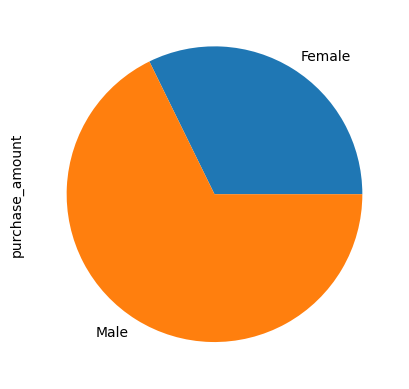

In [45]:
print(df.groupby("gender")["purchase_amount"].sum())
df.groupby("gender")["purchase_amount"].sum().plot(
    kind = "pie"
)
plt.show()

item_purchased
Gloves     3.861429
Sandals    3.844375
Boots      3.818750
Hat        3.801299
Skirt      3.784810
Name: review_rating, dtype: float64


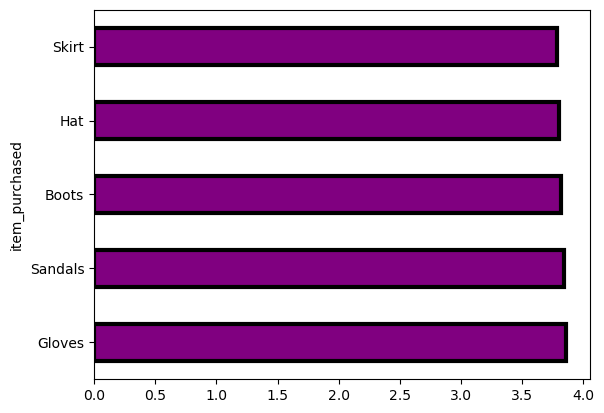

In [33]:
print(df.groupby("item_purchased")["review_rating"].mean().sort_values(ascending = False).head(5))
df.groupby("item_purchased")["review_rating"].mean().sort_values(ascending = False).head(5).plot(
    kind = "barh",
    color = "purple",
    edgecolor = "black",
    linewidth = 3
)
plt.show()

  shipping_type  total_revenue
0       Express      60.475232
1      Standard      58.460245


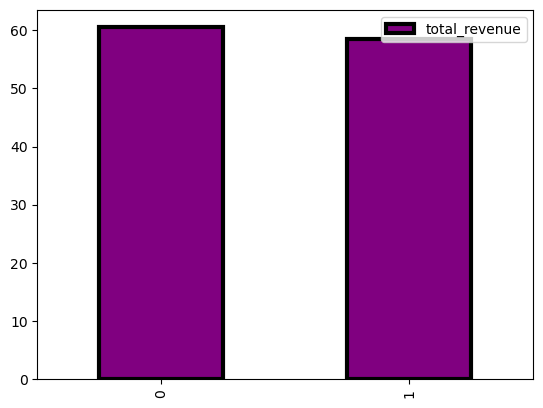

In [42]:
filtered_df = df[df['shipping_type'].isin(['Standard', 'Express'])]
print(filtered_df.groupby('shipping_type', as_index=False)['purchase_amount'].mean().rename(columns={'purchase_amount': 'total_revenue'}).sort_values(by='total_revenue', ascending=False))
filtered_df.groupby('shipping_type', as_index=False)['purchase_amount'].mean().rename(columns={'purchase_amount': 'total_revenue'}).sort_values(by='total_revenue', ascending=False).plot(kind = "bar",
    color = "purple",
    edgecolor = "black",
    linewidth = 3
)
plt.show()

age_group
Young Adult    62143
Adult          55978
Middle age     59197
Senior         55763
Name: purchase_amount, dtype: int64


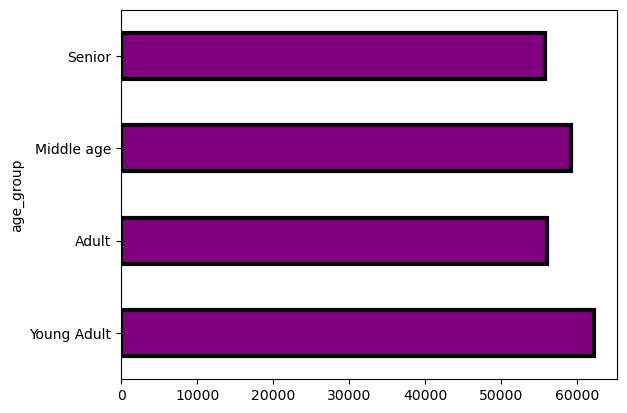

In [47]:
print(df.groupby("age_group")["purchase_amount"].sum())
df.groupby("age_group")["purchase_amount"].sum().plot(
    kind = "barh",
        color = "purple",
    edgecolor = "black",
    linewidth = 3
)
plt.show()